## **Deep Learning com Keras**
 

### `1.Conhecendo o conjunto de dados`

In [15]:
import tensorflow
from tensorflow import keras
import numpy as np
dataset = keras.datasets.fashion_mnist

In [2]:
# Importando os dados
((imagens_train, identifacadores_train),(imagens_test, identifacadores_test)) = dataset.load_data()

# Vizualizando o tamanho dos dados
print(f'Total Treino e Teste:\n{len(imagens_train)}, {len(imagens_test)}')
print(f'\nTamanho Identificadores:\n{len(identifacadores_train)}, {len(identifacadores_test)}')
print(f'\nTamanho Treino e Teste:\n{imagens_train.shape}, {imagens_test.shape}')

Total Treino e Teste:
60000, 10000

Tamanho Identificadores:
60000, 10000

Tamanho Treino e Teste:
(60000, 28, 28), (10000, 28, 28)


Text(0.5, 1.0, '9')

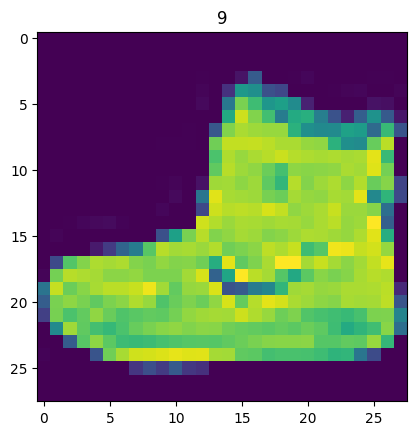

In [3]:
# Vizualizar imagens com
import matplotlib.pyplot as plt

plt.imshow(imagens_train[0])
plt.title(identifacadores_train[0])

In [4]:
# Exibindo Categoria
print(min(identifacadores_train), max(identifacadores_train))

0 9


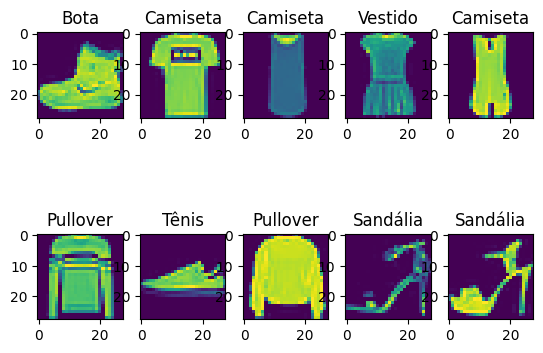

In [5]:
# Vendo tipo de 10 imagens
total_de_class = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_train[imagem])
  plt.title(nomes_de_classificacoes[identifacadores_train[imagem]])

### `2.Começando a montar o modelo`

In [6]:
modelo = keras.Sequential([
     keras.layers.Flatten(input_shape = (28,28)),
     keras.layers.Dense(256, activation='relu'),
     keras.layers.Dense(10, activation = 'softmax')
])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

modelo.fit(imagens_train, identifacadores_train)

/home/ike/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.3391


### `3.Normalizando modelo`

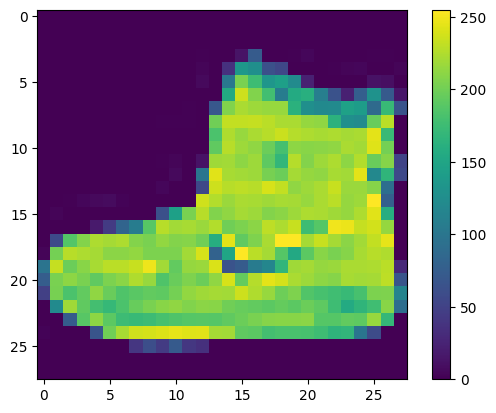

In [7]:
# Verificando cores da imagem
plt.imshow(imagens_train[0])
plt.colorbar()

In [11]:
# Normalização
imagens_train_redu = imagens_train/float(225)


modelo = keras.Sequential([
     keras.layers.Flatten(input_shape = (28,28)),
     keras.layers.Dense(256, activation='relu'),
     keras.layers.Dense(10, activation = 'softmax')
])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

modelo.fit(imagens_train_redu, identifacadores_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6013


In [9]:
modelo = keras.Sequential([
     keras.layers.Flatten(input_shape = (28,28)),
     keras.layers.Dense(256, activation='relu'),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(10, activation = 'softmax')
])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
modelo.fit(imagens_train_redu, identifacadores_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5965


In [10]:
modelo = keras.Sequential([
     keras.layers.Flatten(input_shape = (28,28)),
     keras.layers.Dense(256, activation='relu'),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(64, activation='relu'),
     keras.layers.Dense(10, activation = 'softmax')
])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
modelo.fit(imagens_train_redu, identifacadores_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6186


### `4. Como medir  resulrados do modelo`

In [53]:
# Adicionando a metrica e epocas para treino
imagens_train_redu = imagens_train/float(225)


modelo = keras.Sequential([
     keras.layers.Flatten(input_shape = (28,28)),
     keras.layers.Dense(256, activation='relu'),
     keras.layers.Dense(10, activation = 'softmax')
])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(imagens_train_redu, identifacadores_train, epochs = 10, validation_split = .2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7835 - loss: 0.6273 - val_accuracy: 0.8518 - val_loss: 0.4104
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8619 - loss: 0.3868 - val_accuracy: 0.8661 - val_loss: 0.3839
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8790 - loss: 0.3348 - val_accuracy: 0.8618 - val_loss: 0.3736
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8866 - loss: 0.3096 - val_accuracy: 0.8751 - val_loss: 0.3464
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8930 - loss: 0.2876 - val_accuracy: 0.8828 - val_loss: 0.3282
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8985 - loss: 0.2734 - val_accuracy: 0.8802 - val_loss: 0.3292
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9063 - loss: 0.2552 - val_accuracy: 0.8849 - val_loss: 0.3150
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9059 - loss: 0.2498 - 

In [54]:
# Vendo o resultado nos dados de teste

testes = modelo.predict(imagens_test, verbose= 0)
print(f'Resultado teste: {np.argmax(testes[0])}')
print(f'Valor real: {identifacadores_test[0]}')

Resultado teste: 9
Valor real: 9


In [55]:
# Avaliando o modelo
perda_teste, acuracia_test = modelo.evaluate(imagens_test, identifacadores_test, verbose = 0)

print(f'Perda do teste: {perda_teste:.2f}%')
print(f'Acurácia do teste: {acuracia_test:.2f}%')

Perda do teste: 60.56%
Acurácia do teste: 0.86%


### `5. Ajustando e salvando o modelo`

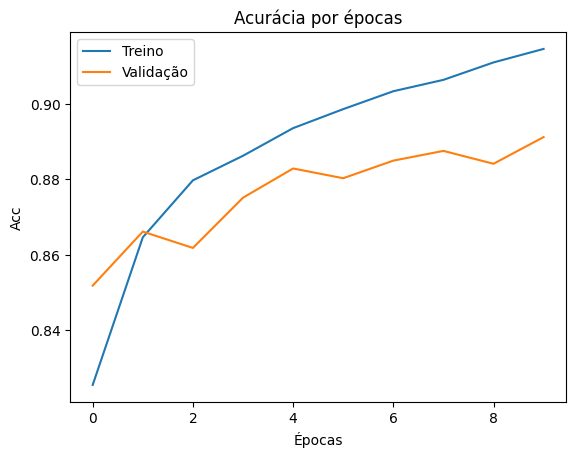

In [56]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acc')
plt.legend(['Treino', 'Validação'])

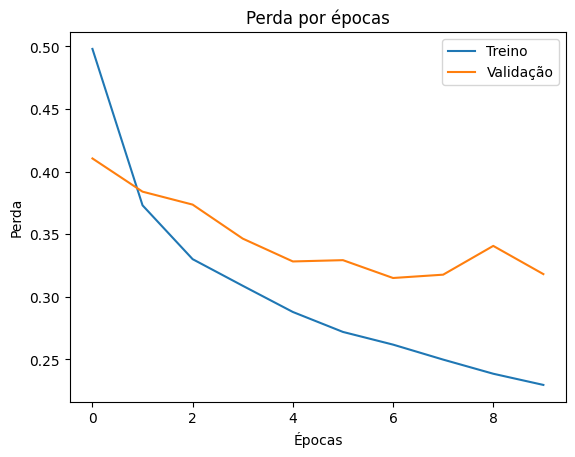

In [57]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])